In [2]:
import numpy as np


def sample(dices=2):
    x = 0
    for _ in range(dices):
        x += np.random.choice([1, 2, 3, 4, 5, 6])
    return x


trial = 1000
V, n = 0, 0

for _ in range(trial):
    s = sample()
    n += 1
    V += (s - V) / n
    print(V)


8.0
7.0
7.0
6.75
6.4
6.666666666666667
7.142857142857143
7.0
6.888888888888889
6.5
6.636363636363637
6.75
6.769230769230769
6.642857142857142
6.466666666666666
6.312499999999999
6.117647058823529
6.444444444444444
6.421052631578947
6.6
6.761904761904762
6.909090909090909
6.782608695652174
6.833333333333333
6.92
6.923076923076923
6.814814814814815
6.678571428571429
6.551724137931035
6.6000000000000005
6.741935483870968
6.75
6.7272727272727275
6.735294117647059
6.685714285714286
6.611111111111112
6.7027027027027035
6.68421052631579
6.666666666666668
6.675000000000001
6.560975609756098
6.4523809523809526
6.534883720930233
6.568181818181818
6.533333333333333
6.456521739130435
6.553191489361702
6.5625
6.530612244897959
6.58
6.686274509803922
6.673076923076923
6.679245283018868
6.648148148148148
6.654545454545454
6.732142857142857
6.7368421052631575
6.758620689655172
6.779661016949152
6.766666666666667
6.737704918032787
6.758064516129032
6.746031746031746
6.78125
6.815384615384615
6.83333333

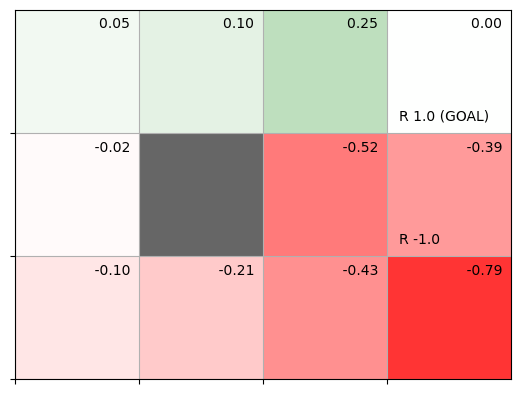

In [4]:

from collections import defaultdict
import numpy as np
from common.gridworld import GridWorld


class RandomAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.V = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def eval(self):
        G = 0
        for data in reversed(self.memory):  # 역방향으로(reserved) 따라가기
            state, action, reward = data
            G = self.gamma * G + reward
            self.cnts[state] += 1
            self.V[state] += (G - self.V[state]) / self.cnts[state]


env = GridWorld()
agent = RandomAgent()

episodes = 1000
for episode in range(episodes):  # 에피소드 1000번 수행
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)             # 행동 선택
        next_state, reward, done = env.step(action)  # 행동 수행

        agent.add(state, action, reward)  # (상태, 행동, 보상) 저장
        if done:   # 목표에 도달 시
            agent.eval()  # 몬테카를로법으로 가치 함수 갱신
            break         # 다음 에피소드 시작

        state = next_state

# [그림 5-12] 몬테카를로법으로 얻은 가치 함수
env.render_v(agent.V)


In [2]:
import numpy as np

x = np.array([1, 2, 3])         # 확률 변수
pi = np.array([0.1, 0.1, 0.8])  # 확률 분포

# =========== 기댓값의 참값 계산 ==================
e = np.sum(x * pi)
print('참값(E_pi[x]):', e)

# =========== 몬테카를로법으로 계산 ==================
n = 100  # 샘플 개수
samples = []
for _ in range(n):
    s = np.random.choice(x, p=pi)  # pi를 이용한 샘플링
    samples.append(s)

mean = np.mean(samples)  # 샘플들의 평균
var = np.var(samples)    # 샘플들의 분산
print('몬테카를로법: {:.2f} (분산: {:.2f})'.format(np.mean(samples), np.var(samples)))

참값(E_pi[x]): 2.7
몬테카를로법: 2.66 (분산: 0.42)


In [3]:
# =========== 중요도 샘플링으로 계산 ===========

b = np.array([1/3, 1/3, 1/3])
# b = np.array([0.2, 0.2, 0.6])  

samples = []
for _ in range(n):
    idx = np.arange(len(b))         # b의 인덱스([0, 1, 2])
    i = np.random.choice(idx, p=b)  # b를 사용하여 샘플링
    s = x[i]
    rho = pi[i] / b[i]              # 가중치
    samples.append(rho * s)         # 샘플 데이터에 가중치를 곱해 저장
    
mean = np.mean(samples)
var = np.var(samples)
print('중요도 샘플링: {:.2f} (분산: {:.2f})'.format(np.mean(samples), np.var(samples)))


중요도 샘플링: 2.97 (분산: 10.54)


In [4]:
# =========== 중요도 샘플링으로 계산 ===========

# b = np.array([1/3, 1/3, 1/3])
b = np.array([0.2, 0.2, 0.6])  

samples = []
for _ in range(n):
    idx = np.arange(len(b))         # b의 인덱스([0, 1, 2])
    i = np.random.choice(idx, p=b)  # b를 사용하여 샘플링
    s = x[i]
    rho = pi[i] / b[i]              # 가중치
    samples.append(rho * s)         # 샘플 데이터에 가중치를 곱해 저장
    
mean = np.mean(samples)
var = np.var(samples)
print('중요도 샘플링: {:.2f} (분산: {:.2f})'.format(np.mean(samples), np.var(samples)))


중요도 샘플링: 2.92 (분산: 2.41)
